In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
N = 100
f = lambda x: 0.3 * x + 5.0 # Target function
x_train = np.linspace(-20, 60, N)
np.random.seed(313)
y_train = f(x_train) + 10 * np.random.rand(len(x_train))

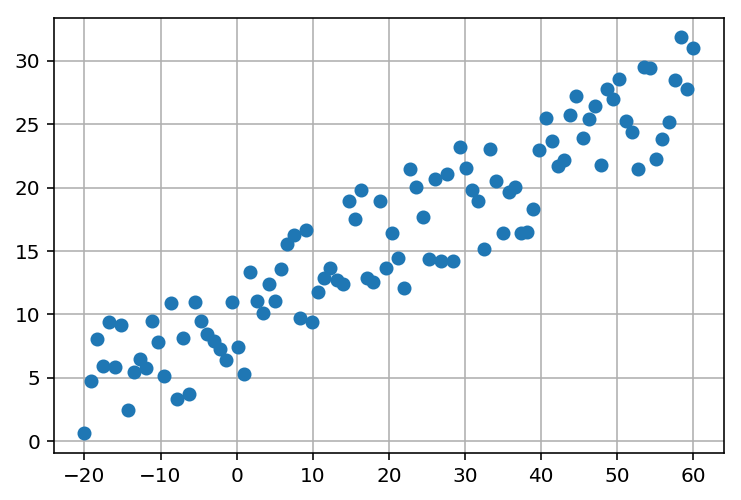

In [3]:
plt.plot(x_train,y_train, 'o')
plt.grid()
plt.show()

### TODO 1

\begin{equation}
\min_w loss(w;x,y)
\end{equation}
where
\begin{equation}
loss(w;x,y) = \frac{1}{N}\sum_{i=1}^N |w_0x_i + w_1 - y_i|^2
\end{equation}

$loss(w;x,y)$의 Gradient를 구하는 `grad_loss`의 빈칸을 채우세요.

\begin{equation}
\nabla loss(w) = \frac{2}{N}\sum_{i=1}^N (w_0x_i + w_1 - y_i)
\begin{bmatrix}
x_i\\1\\
\end{bmatrix}
\end{equation}


In [4]:
def loss(w, x_list, y_list):
    N = len(x_list)
    val = 0.0
    for i in range(N):
        val += (w[0] * x_list[i] + w[1] - y_list[i])**2 / N
    return val

def grad_loss(w, x_list, y_list):
    dim = len(w)
    N = len(x_list)
    val = np.array([0.0, 0.0])
    for i in range(N):
        # TODO 2
        er = w[0] * x_list[i] + w[1] - y_list[i]
        val += 2.0 * er * np.array([x_list[i], 1.0]) / N
    return val

In [5]:
W0 = np.linspace(-100, 100, 101)
W1 = np.linspace(-100, 100, 101)
W0, W1 = np.meshgrid(W0,W1)
LOSSW = W0 * 0
for i in range(W0.shape[0]):
    for j in range(W0.shape[1]):
        wij = np.array([W0[i,j], W1[i,j]])
        LOSSW[i,j] = loss(wij, x_train, y_train)

In [6]:
from helper import gradient_descent
w0 = np.array([-5.0, -5.0])
w_gd, path_gd = gradient_descent(grad_loss, x_train, y_train, w0, learning_rate=1E-3, MaxIter=1000)
print(w_gd, loss(w_gd, x_train, y_train))

[0.4023273  5.33678103] 20.65777031246318


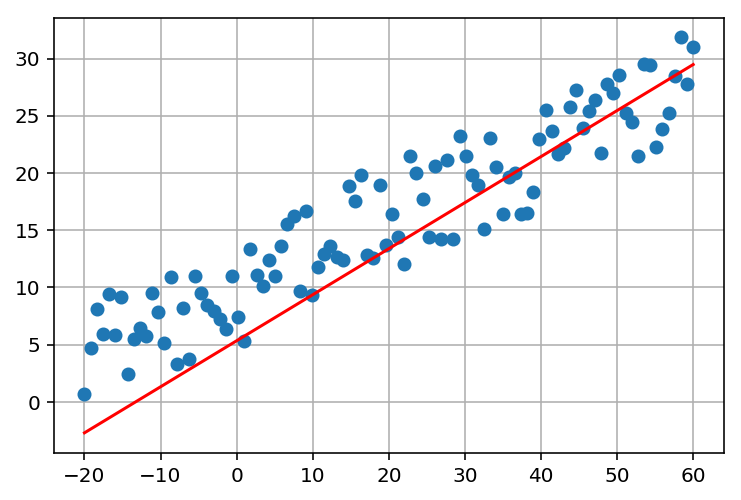

In [7]:
y_pred = w_gd[0] * x_train + w_gd[1]
plt.plot(x_train,y_train, 'o')
plt.plot(x_train, y_pred, '-r')
plt.grid()
plt.show()

[ 0.69699849 -8.56479889] 207.5865412009573


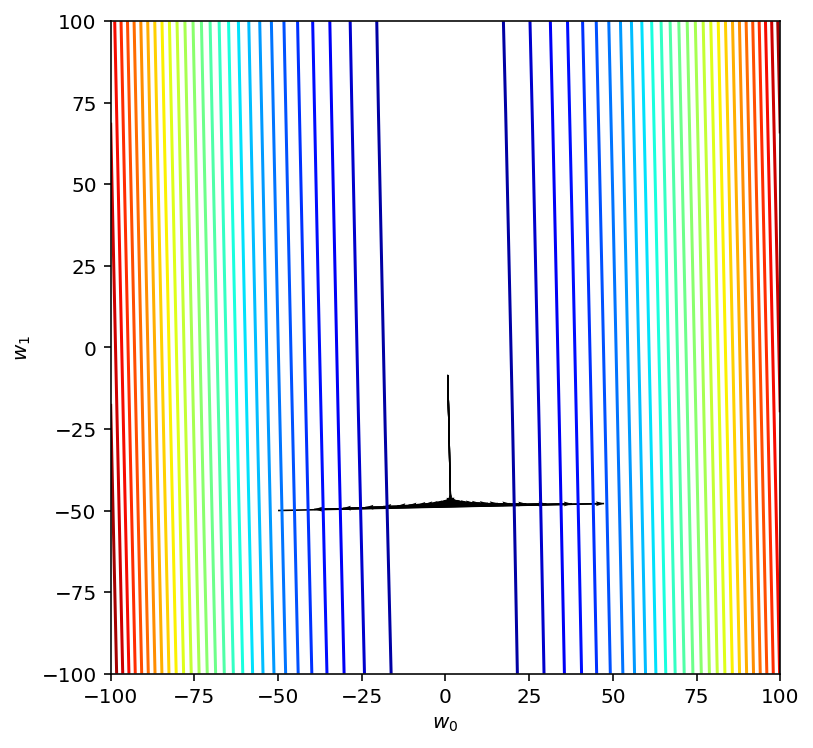

In [8]:
from helper import gradient_descent
w0 = np.array([-50.0, -50.0])
w_gd, path_gd = gradient_descent(grad_loss, x_train, y_train, w0, learning_rate=1E-3, MaxIter=1000)
print(w_gd, loss(w_gd, x_train, y_train))

paths = path_gd
paths = np.array(np.matrix(paths).T)
fig, ax = plt.subplots(figsize=(6, 6))

ax.contour(W0, W1, LOSSW, cmap=plt.cm.jet, levels=np.linspace(0, max(LOSSW.flatten()),30))
ax.quiver(paths[0,:-1], paths[1,:-1], paths[0,1:]-paths[0,:-1], paths[1,1:]-paths[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')

ax.set_xlabel('$w_0$')
ax.set_ylabel('$w_1$')
plt.show()

### TODO 3

Scaling을 구현해봅니다. 알고리즘은 다음과 같이 작성하시면 됩니다.

$$
\hat{x} = \frac{x - x_{min}}{x_{max} - x_{min}}
$$



In [9]:
# TODO 3
scaled_x_train = (x_train - np.min(x_train)) / (np.max(x_train) - np.min(x_train))
W0 = np.linspace(-100, 100, 101)
W1 = np.linspace(-100, 100, 101)
W0, W1 = np.meshgrid(W0,W1)
LOSSW = W0 * 0
LOSSW_Scaled = W0 * 0
for i in range(W0.shape[0]):
    for j in range(W0.shape[1]):
        wij = np.array([W0[i,j], W1[i,j]])
        LOSSW[i,j] = loss(wij, x_train, y_train)
        LOSSW_Scaled[i,j] = loss(wij, scaled_x_train, y_train)

[24.15646841  4.02251023] 7.844938625425709


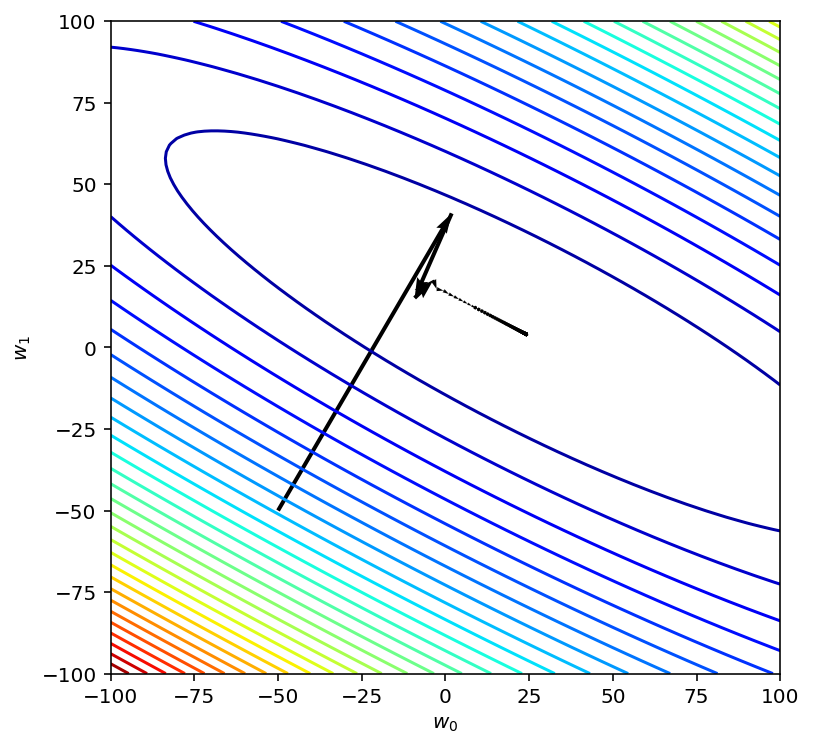

In [10]:
from helper import gradient_descent
w0 = np.array([-50.0, -50.0])
w_gd_sc, path_gd_sc = gradient_descent(grad_loss, scaled_x_train, y_train, w0, learning_rate=.5, MaxIter=100)
print(w_gd_sc, loss(w_gd_sc, scaled_x_train, y_train))

paths = path_gd_sc
paths = np.array(np.matrix(paths).T)
fig, ax = plt.subplots(figsize=(6, 6))

ax.contour(W0, W1, LOSSW_Scaled, cmap=plt.cm.jet, levels=np.linspace(0, max(LOSSW_Scaled.flatten()),30))
ax.quiver(paths[0,:-1], paths[1,:-1], paths[0,1:]-paths[0,:-1], paths[1,1:]-paths[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')

ax.set_xlabel('$w_0$')
ax.set_ylabel('$w_1$')
plt.show()

[ 0.69699849 -8.56479889] 207.5865412009573
[24.15646841  4.02251023] 7.844938625425709


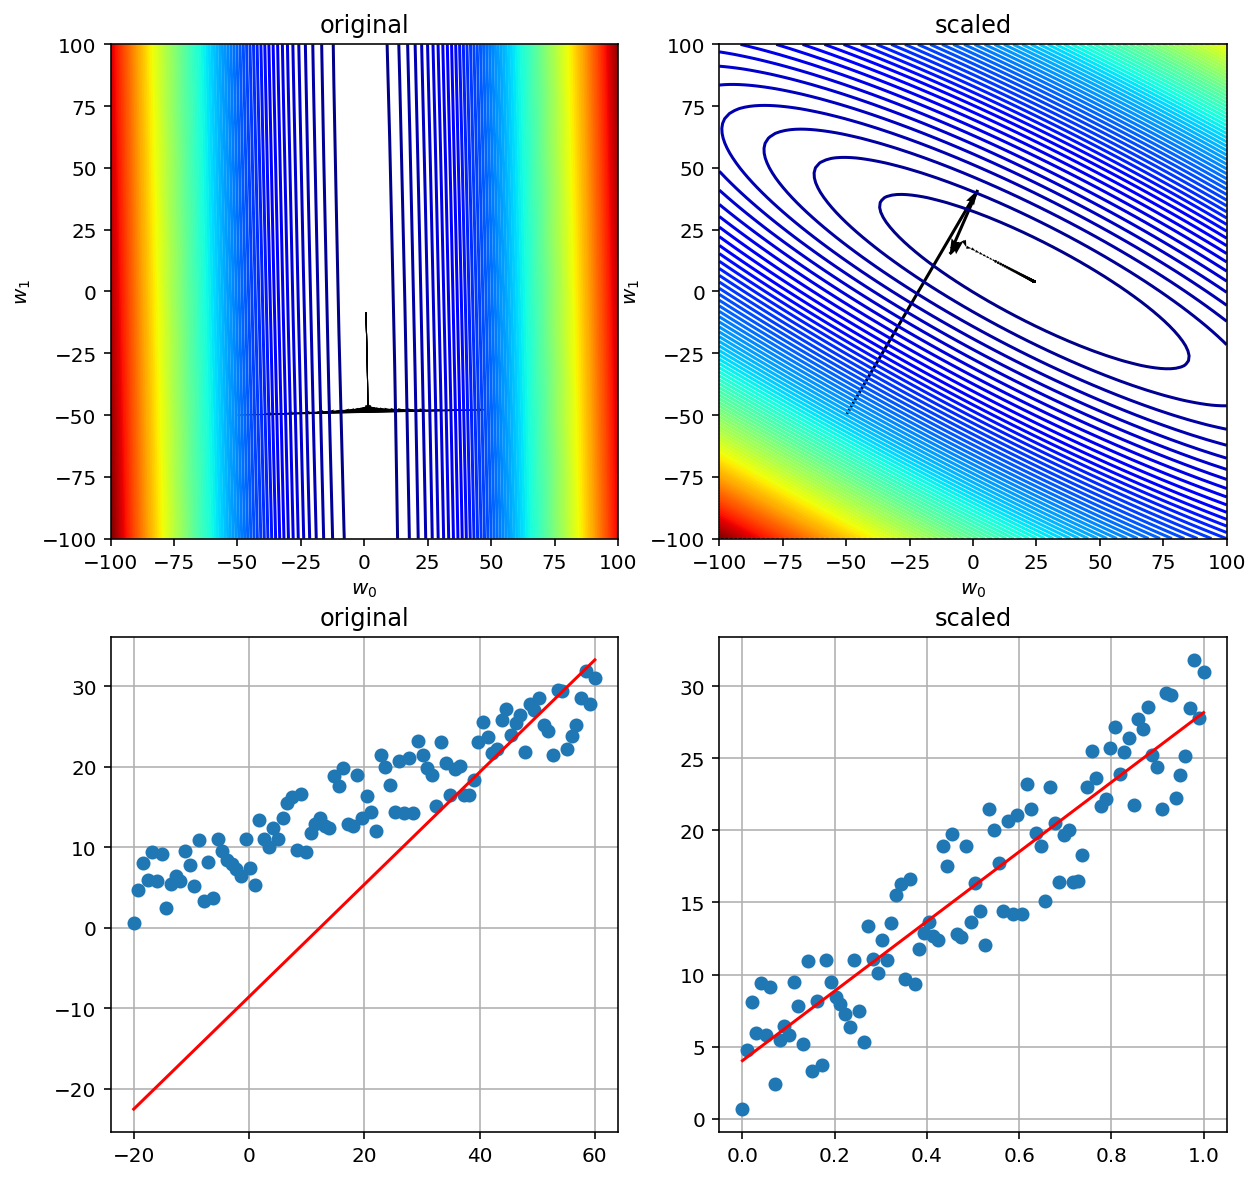

In [11]:
w0 = np.array([-50.0, -50.0])
w_gd, path_gd = gradient_descent(grad_loss, x_train, y_train, w0, learning_rate=1E-3, MaxIter=1000)
print(w_gd, loss(w_gd, x_train, y_train))

w_gd_sc, path_gd_sc = gradient_descent(grad_loss, scaled_x_train, y_train, w0, learning_rate=.5, MaxIter=100)
print(w_gd_sc, loss(w_gd_sc, scaled_x_train, y_train))

fig = plt.figure(figsize=(10, 10))
plt.subplot(221)
paths = path_gd
paths = np.array(np.matrix(paths).T)

plt.contour(W0, W1, LOSSW, cmap=plt.cm.jet, levels=np.linspace(0, max(LOSSW.flatten()),90))
plt.quiver(paths[0,:-1], paths[1,:-1], paths[0,1:]-paths[0,:-1], paths[1,1:]-paths[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')

plt.xlabel('$w_0$')
plt.ylabel('$w_1$')
plt.title('original')

plt.subplot(222)
paths = path_gd_sc
paths = np.array(np.matrix(paths).T)

plt.contour(W0, W1, LOSSW_Scaled, cmap=plt.cm.jet, levels=np.linspace(0, max(LOSSW_Scaled.flatten()),90))
plt.quiver(paths[0,:-1], paths[1,:-1], paths[0,1:]-paths[0,:-1], paths[1,1:]-paths[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')

plt.xlabel('$w_0$')
plt.ylabel('$w_1$')
plt.title('scaled')

plt.subplot(223)
y_pred = w_gd[0] * x_train + w_gd[1]
plt.plot(x_train, y_train, 'o')
plt.plot(x_train, y_pred, '-r')
plt.grid()
plt.title('original')

plt.subplot(224)
y_pred = w_gd_sc[0] * scaled_x_train + w_gd_sc[1]
plt.plot(scaled_x_train, y_train, 'o')
plt.plot(scaled_x_train, y_pred, '-r')
plt.grid()
plt.title('scaled')
plt.show()

| item | Original Data   | Normalized Data |
|------|------|------|
|   iteration 횟수  | 1000|100|
|   learning_rate | 0.001|0.5|
|   loss  | 207.5|7.8|